<a href="https://colab.research.google.com/github/Daki-15/dog-breed-classifier/blob/main/Dog_Breed_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-end Multil-class Dog Breed Classification 🐕
This notebook builds an end-to-end multi-class image
classifier using TensorFlow 2.0 and TensorFlow Hub.

## 1. Problem
Identifying the breed of a dog given an image of a dog.
When I'm sitting at the cafe and I take a photo of a dog, I
want to know what breed of dog it is.

## 2. Data
The data we're using is from Kaggle's dog breed
identification competition.
https://www.kaggle.com/competitions/dog-breed-identification

## 3. Evaluation

## 4. Features
Some information about the data:
* Were dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 22,000+ images in the training set (these images have labels).
* There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them).


In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd

In [2]:
# Tensorflow version(we need 2.x)
print("TF  versin", tf.__version__)
print("TF Hub versin", hub.__version__)
# Check for GPU availability
print("GPU", "AVAILABLE YES!!!" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE :((")

TF  versin 2.15.0
TF Hub versin 0.16.1
GPU AVAILABLE YES!!!


## Getting our data ready (turning into Tensors)
With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first. Turning our images into Tensors
(numerical representations)

Let's start by accessing our data and checking out the labels.

In [3]:
# Checkout the labels of our data
LABEL_PATH = "drive/MyDrive/Colab_Notebooks/DogData/labels.csv"

labels_csv = pd.read_csv(LABEL_PATH)

print(labels_csv.describe())

labels_csv.head()

                     id               breed
count             22222               22222
unique            22222                 120
top     n02110627_10185  scottish_deerhound
freq                  1                 226


id          breed
0  n02110627_10185  affenpinscher
1  n02110627_10437  affenpinscher
2  n02110627_10447  affenpinscher
3  n02110627_10680  affenpinscher
4  n02110627_10787  affenpinscher

In [4]:
labels_csv["breed"].unique()

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'greater_swiss_mount

In [5]:
# How many images are there of each breeed?
print(labels_csv["breed"].value_counts())

breed
scottish_deerhound      226
maltese_dog             217
afghan_hound            216
entlebucher             215
bernese_mountain_dog    214
                       ... 
golden_retriever        167
komondor                167
brabancon_griffon       167
briard                  166
eskimo_dog              166
Name: count, Length: 120, dtype: int64


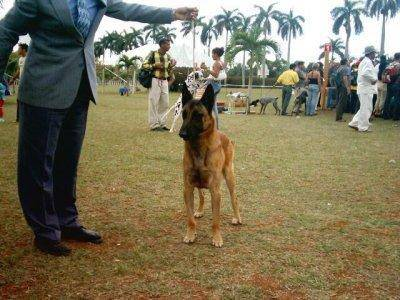

In [6]:
# Let's view an image
from IPython.display import Image

TEST_IMG_PATH = "drive/MyDrive/Colab_Notebooks/DogData/train/b851f6cbfd20d707f7427a0278913045.jpg"
Image(TEST_IMG_PATH)

### Getting images and their labels
Let's get a list of all of our image file pathnames.

In [28]:
# Create pathnames from ID's
TRAIN_IMG_PATH = "drive/MyDrive/Colab_Notebooks/DogData/train"
filenames = [TRAIN_IMG_PATH + "/" + fname + ".jpg" for fname in labels_csv["id"]]
filenames[:10]

['drive/MyDrive/Colab_Notebooks/DogData/train/n02110627_10185.jpg',
 'drive/MyDrive/Colab_Notebooks/DogData/train/n02110627_10437.jpg',
 'drive/MyDrive/Colab_Notebooks/DogData/train/n02110627_10447.jpg',
 'drive/MyDrive/Colab_Notebooks/DogData/train/n02110627_10680.jpg',
 'drive/MyDrive/Colab_Notebooks/DogData/train/n02110627_10787.jpg',
 'drive/MyDrive/Colab_Notebooks/DogData/train/n02110627_10848.jpg',
 'drive/MyDrive/Colab_Notebooks/DogData/train/n02110627_10859.jpg',
 'drive/MyDrive/Colab_Notebooks/DogData/train/n02110627_10986.jpg',
 'drive/MyDrive/Colab_Notebooks/DogData/train/n02110627_11211.jpg',
 'drive/MyDrive/Colab_Notebooks/DogData/train/n02110627_11279.jpg']

In [29]:
import os

TRAIN_IMG_PATH = "/content/drive/MyDrive/Colab_Notebooks/DogData/train"

len(os.listdir(TRAIN_IMG_PATH)), len(filenames)

(22222, 22222)

In [30]:
# Checkout whether number of filenames matches number of actual image files
import os

if len(os.listdir(TRAIN_IMG_PATH)) == len(filenames):
  print("Filenames match acual amount of files!!!")
else:
  print("Filenames DO NO match acual amount of files!!!")

Filenames match acual amount of files!!!


Since we've now got our training image filepaths in a list, let's prepare our labels.

In [31]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels, len(labels)

(array(['affenpinscher', 'affenpinscher', 'affenpinscher', ..., 'airedale',
        'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object),
 22222)

In [32]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories!")

Number of labels matches number of filenames!


In [33]:
# Find the unique labels values
unique_breeds = np.unique(labels)
unique_breeds[:5], len(unique_breeds)

(array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
        'american_staffordshire_terrier'], dtype=object),
 120)

In [34]:
# Turn evert label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2], len(boolean_labels)

([array([ True, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False]),
  array([ True, False, False, Fa

In [35]:
# Example: Turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

affenpinscher
(array([0]),)
0
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Creating our own validation set
Since the dataset from Kaggle doesn't come with a validation set, we're going to create our own.

In [36]:
# Setup X and y variables
X = filenames
y = boolean_labels

X[:2], y[:2]

(['drive/MyDrive/Colab_Notebooks/DogData/train/n02110627_10185.jpg',
  'drive/MyDrive/Colab_Notebooks/DogData/train/n02110627_10437.jpg'],
 [array([ True, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, Fals

We're going to start off experimenting with ~ 1000 images and increase as needed.

In [18]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type: "slider", min:100, max:10000, step:100}

In [37]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2, # validation size
                                                  random_state=42 # same like np.random.seed(42)
                                                  )

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

## Preprocessing Images (turning images into Tensors)

To preprocess our images into Tensors we're going to write a function which does a few things:
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Resize the `image` to be a shape of (224, 224)
5. Return the modified `image`


Before we do, let's see what importing an image looks like.

In [38]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[0])
image[:2], image.shape

# Convert into tensor
tf.constant(image)

<tf.Tensor: shape=(314, 342, 3), dtype=uint8, numpy=
array([[[ 78,  51,  42],
        [ 87,  60,  51],
        [129, 102,  93],
        ...,
        [ 93,  90,  81],
        [ 90,  87,  78],
        [ 87,  84,  75]],

       [[100,  73,  64],
        [103,  76,  67],
        [ 91,  64,  55],
        ...,
        [ 94,  92,  80],
        [ 92,  89,  80],
        [ 91,  89,  77]],

       [[100,  73,  64],
        [125,  98,  89],
        [103,  76,  67],
        ...,
        [ 95,  93,  80],
        [ 93,  91,  79],
        [ 93,  91,  78]],

       ...,

       [[117,  96,  91],
        [129, 108, 103],
        [137, 116, 111],
        ...,
        [117, 102,  95],
        [108,  93,  86],
        [113,  98,  91]],

       [[133, 109, 105],
        [129, 105, 101],
        [128, 104, 100],
        ...,
        [115, 100,  93],
        [104,  89,  82],
        [127, 112, 105]],

       [[133, 109, 105],
        [129, 105, 101],
        [128, 104, 100],
        ...,
        [116, 101,  9

### Now we've seen what an image looks like as a Tensor, let's make a function to preprocess them.
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our images (convert the colour channel values from 0-255 to 0-1)
5. Resize the `image` to be a shape of (224, 224)
6. Return the modified `image`

In [39]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def preprocessing_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  #Read in an Image file
  image = tf.io.read_file(image_path)
  # Turn the "".jpag" image into numerical Tensor with 3 color channels (RGB-Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Normalization
  image = tf.image.convert_image_dtype(image=image, dtype=tf.float32)
  # Resize the immage to our desired value (224, 224)
  image = tf.image.resize(image, size=(IMG_SIZE, IMG_SIZE))

  return image


In [40]:
preprocessing_image(filenames[0])

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.3197083 , 0.22559065, 0.18637495],
        [0.44118962, 0.34707198, 0.3078563 ],
        [0.3856012 , 0.29148355, 0.25226787],
        ...,
        [0.35004437, 0.35004437, 0.30298555],
        [0.3520481 , 0.3520481 , 0.30498928],
        [0.3358271 , 0.3358271 , 0.2887683 ]],

       [[0.3993376 , 0.30521992, 0.26600423],
        [0.3886193 , 0.29450163, 0.25528595],
        [0.3252384 , 0.23112075, 0.19190507],
        ...,
        [0.36999953, 0.3652726 , 0.31585035],
        [0.36353844, 0.35881156, 0.3093893 ],
        [0.35610995, 0.35138306, 0.3019608 ]],

       [[0.39700994, 0.30289227, 0.26367658],
        [0.3663829 , 0.27226526, 0.23304956],
        [0.47871494, 0.3845973 , 0.3453816 ],
        ...,
        [0.38032857, 0.37249094, 0.31898406],
        [0.37093544, 0.36310613, 0.30587956],
        [0.36478055, 0.35695028, 0.30014473]],

       ...,

       [[0.5244834 , 0.44997364, 0.42644423],
        [0.44

## Turning our data into batches
Why turn our data into batches?

Let's say you're trying to process 10,000+ images in one go... they all might not fit into memory.

So that's why we do about 32 (this is the batch size) images at a time (you can manually adjust the batch size if need be).

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples witch look like this: `(image, label)`

In [41]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and reutrns a typle of (image, label).
  """
  image = preprocessing_image(image_path)
  return image, label

Now we've got a way to turn our data into tuples of Tensors in the form: `(image, label)`, let's make a function to turn all of our data (`X` and `y`)
into batches!

In [42]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels)-
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filenames (no labels)
    data_batch = data.map(preprocessing_image).batch(BATCH_SIZE)
    return data_batch

  #If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                            tf.constant(y)))   # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),  # filepaths
                                               tf.constant(y))) # labels
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))
    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
  return data_batch

In [43]:
# Create training and validation data baches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [44]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches
Our data is now in batches, however, these can be a little
hard to understand/comprehend, let's visualize them!|

In [45]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels): # For now we show just 25 images
  """
    Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displzying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [46]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [48]:
# unbatchefying data
train_images, train_labels = next(train_data.as_numpy_iterator())

train_images, train_labels

(array([[[[1.53920248e-01, 2.67874658e-01, 2.18999349e-02],
          [1.01142719e-01, 2.03607231e-01, 3.01675219e-03],
          [3.26197669e-02, 1.24266818e-01, 0.00000000e+00],
          ...,
          [2.79292136e-01, 2.51841158e-01, 2.83213705e-01],
          [1.94061235e-01, 1.74453393e-01, 2.00845107e-01],
          [1.72556490e-01, 1.52948648e-01, 1.72821671e-01]],
 
         [[1.81119502e-01, 2.51212776e-01, 7.50540867e-02],
          [1.06982082e-01, 1.67603299e-01, 1.92019735e-02],
          [1.80973951e-02, 6.78085312e-02, 0.00000000e+00],
          ...,
          [2.60165870e-01, 2.32714906e-01, 2.63367325e-01],
          [2.03331470e-01, 1.83723599e-01, 2.07253039e-01],
          [1.89035878e-01, 1.69428021e-01, 1.87022433e-01]],
 
         [[1.51288554e-01, 1.75686702e-01, 6.81828260e-02],
          [6.54912591e-02, 8.70185420e-02, 9.27721988e-03],
          [1.87425744e-02, 3.38547230e-02, 0.00000000e+00],
          ...,
          [3.40556681e-01, 3.13420832e-01, 3.3992

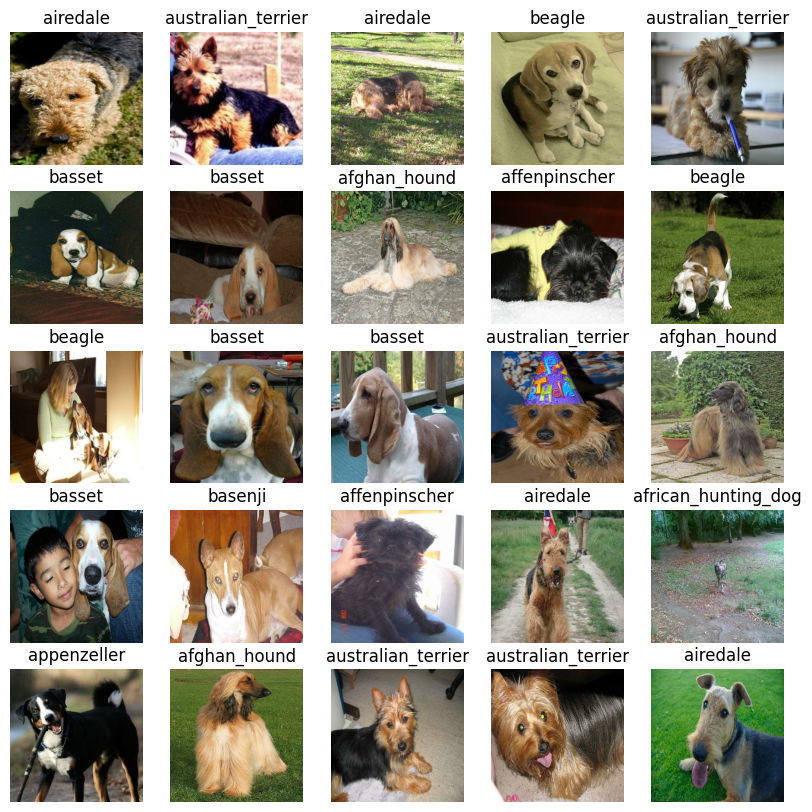

In [49]:
# Now let's visualize our train set
show_25_images(train_images, train_labels)

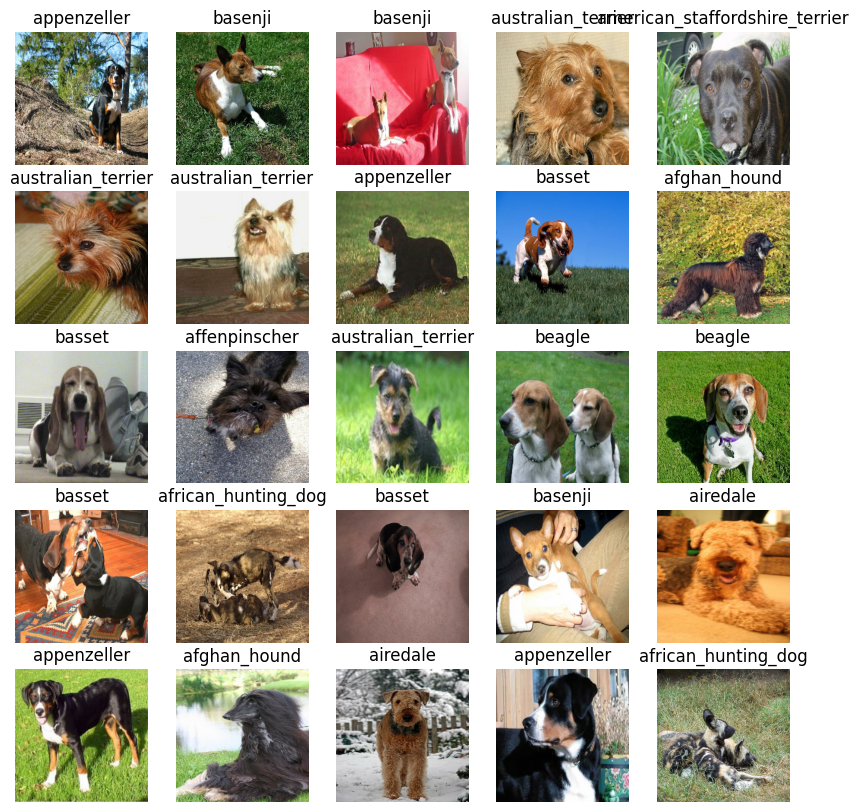

In [50]:
# Now let's visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Bilding a model
Before we build a model, there are a few things we need to define:
*  The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the mordel we want to use. (We can build our own model, but we will use the already trained model from TensorFlow Hub)

In [51]:
IMG_SIZE

224

In [52]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # barch, height, width, color channals

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://www.kaggle.com/models/google/resnet-v2/frameworks/TensorFlow2/variations/101-classification/versions/2"

Now we've got our inputs, outputs and model ready to go. Let's put them together into a Keras deep learning model!
Knowing this, let's create a function which:
* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a Keras model in sequential fashion (do this first, then this, then that).
* Compiles the model (says it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting).
* Returns the model


All of these steps can be found here: https://www.tensorflow.org/api_docs/python/tf/keras/Model

In [53]:
# Create a function witch build a Keras model

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with: ", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
          hub.KerasLayer(MODEL_URL),                   # Layer 1 (input layer)
          tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                activation="softmax")  # Layer 2 (output layer)
        ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  model.build(INPUT_SHAPE)

  return model

In [54]:
model = create_model()
model.summary()

Building model with:  https://www.kaggle.com/models/google/resnet-v2/frameworks/TensorFlow2/variations/101-classification/versions/2
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              44677609  
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 44797849 (170.89 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 44677609 (170.43 MB)
_________________________________________________________________


## Creating callbacks
Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if
a model stops improving

We'll create two callbacks, one for TensorBoard which helps
track our models progress and another for early stopping
which prevents our model from training for too long.

## TensorBoard Callback

To setup a TensorBoard callback, we need to do 3 things:
1. Load the TensorBoard notebook extension
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit ()` function.
3. Visualize our models training logs with the `%tensorboard` magic function (we'll do this after model training).

In [55]:
# Load TensorBorad nootbook extension
%load_ext tensorboard

In [56]:
import datetime

# Create function to build TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/MyDrive/Colab Notebooks/DogData/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d--%H%M%S"))

  return tf.keras.callbacks.TensorBoard(logdir)

### Early Stopping Callback

Early stopping helps stop our model from overfitting by
stopping training if a certain evaluation metric stops
improving.


https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [57]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a model (on subset of data)
Oursfirst model is only going to tarain on 1000 images, to make sure everything is working

In [58]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [59]:
# Check to make sure we're still running on a GPU

print("GPU:", "RUNNING" if tf.config.list_logical_devices("GPU") else "NOT RUNNING")

GPU: RUNNING


Let's create a function which trains a model.
* Create a model using `create_model()`
* Setup a TensorBoard callback using `create_tensorboard_callback()`
* Call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for (`NUM _EPOCHS`) and the
callbacks we'd like to use
• Return the model

In [60]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [61]:
# Fit the model to the data
model = train_model()

Building model with:  https://www.kaggle.com/models/google/resnet-v2/frameworks/TensorFlow2/variations/101-classification/versions/2
Epoch 1/100
25/25 [==============================] - 156s 6s/step - loss: 1.9554 - accuracy: 0.6112 - val_loss: 0.2934 - val_accuracy: 0.8900
Epoch 2/100
25/25 [==============================] - 6s 219ms/step - loss: 0.1276 - accuracy: 0.9650 - val_loss: 0.1931 - val_accuracy: 0.9350
Epoch 3/100
25/25 [==============================] - 6s 222ms/step - loss: 0.0605 - accuracy: 0.9850 - val_loss: 0.2009 - val_accuracy: 0.9300
Epoch 4/100
25/25 [==============================] - 5s 216ms/step - loss: 0.0397 - accuracy: 0.9912 - val_loss: 0.1992 - val_accuracy: 0.9400
Epoch 5/100
25/25 [==============================] - 5s 215ms/step - loss: 0.0286 - accuracy: 0.9950 - val_loss: 0.1904 - val_accuracy: 0.9450
Epoch 6/100
25/25 [==============================] - 5s 212ms/step - loss: 0.0217 - accuracy: 0.9987 - val_loss: 0.1949 - val_accuracy: 0.9450
Epoch 7/10

In [89]:
print(model.evaluate)

<bound method Model.evaluate of <keras.src.engine.sequential.Sequential object at 0x7def3c532800>>


In [ ]:
%tensorboard --logdir drive/MyDrive/Colab_Notebooks/DogData/logs

In [63]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)

7/7 [==============================] - 2s 171ms/step


In [65]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prodiction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

In [66]:
# Test function
pred_label = get_pred_label(predictions[0])
pred_label

'appenzeller'

Now since our validation data is still in a batch dataset, we'll have to unbatchify it to make predictions on the validation images and then
compare those predictions to the validation labels (truth labels).

In [67]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
    Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
    of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

In [68]:
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.64771605, 0.8751671 , 1.        ],
         [0.6298687 , 0.8573197 , 0.9642924 ],
         [0.6788043 , 0.89841217, 1.        ],
         ...,
         [0.49850592, 0.7569741 , 0.926502  ],
         [0.6373681 , 0.86622834, 0.99781954],
         [0.6341121 , 0.8563198 , 0.97793216]],
 
        [[0.6701257 , 0.89757675, 1.        ],
         [0.5934694 , 0.8130773 , 0.95810103],
         [0.68343484, 0.902416  , 0.9996743 ],
         ...,
         [0.5448791 , 0.7961274 , 0.9680497 ],
         [0.63727885, 0.86223745, 1.        ],
         [0.6509636 , 0.8627014 , 1.        ]],
 
        [[0.68518794, 0.9072643 , 1.        ],
         [0.5613653 , 0.7809732 , 0.9140439 ],
         [0.68108374, 0.8954338 , 0.9991714 ],
         ...,
         [0.5667134 , 0.8083976 , 0.9808474 ],
         [0.65221465, 0.8664899 , 1.        ],
         [0.6366619 , 0.84063613, 0.9958729 ]],
 
        ...,
 
        [[0.37238383, 0.30056125, 0.24565928],
         [0.29603866, 0.21154986, 0.15997

Now we've got ways to get:
* Prediction labels
* Validation labels (truth labels)
* Validation images

Let's make some function to make these all a bit more visaulize.

We'll create a function which:
* Takes an array of prediction probabilities, an array of truth labels and an array of images and an integer.
* Convert the prediction probabilities to a predicted label.
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot.

In [69]:
def plot_pred(prediction_probabilities, labels, images, n=0):
  """
    View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image and remove ticks
  plt.imshow(image)
  plt.axis("off")

  # Change the coulour of the title depending on if prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted probability of prediction and truth label
  plt.title((f"Prediction: {pred_label} \nConfident: {(np.max(pred_prob)*100):2.0f}% \nTrue label: {true_label}"), color=color)

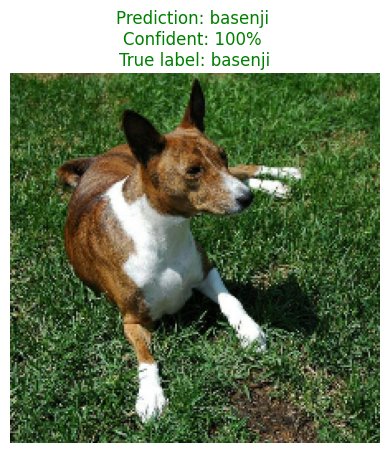

In [70]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=1)

Now we've got one function to visualize our models top prediction, let's make another to view our models top 10 predictions.
This function will:
* Take an input of prediction probabilities array and a ground truth array and an integer
* Find the prediction using `get_pred_label()`
* Find the top 10:
  * Prediction probabilities indexes
  * Prediction probabilities values
  * Prediction labels
  * Plot the top 10 prediction probability values and labels, coloring the true label green

In [71]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot

  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

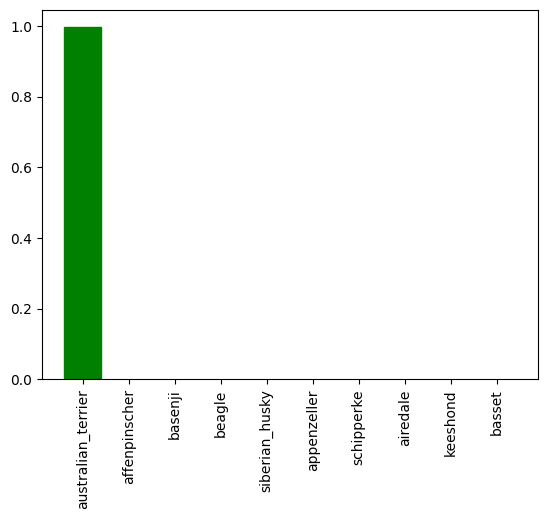

In [72]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels, n=5)

Now we've got some function to help us visualize our predictions and evaluate our modle, let's check out a few.

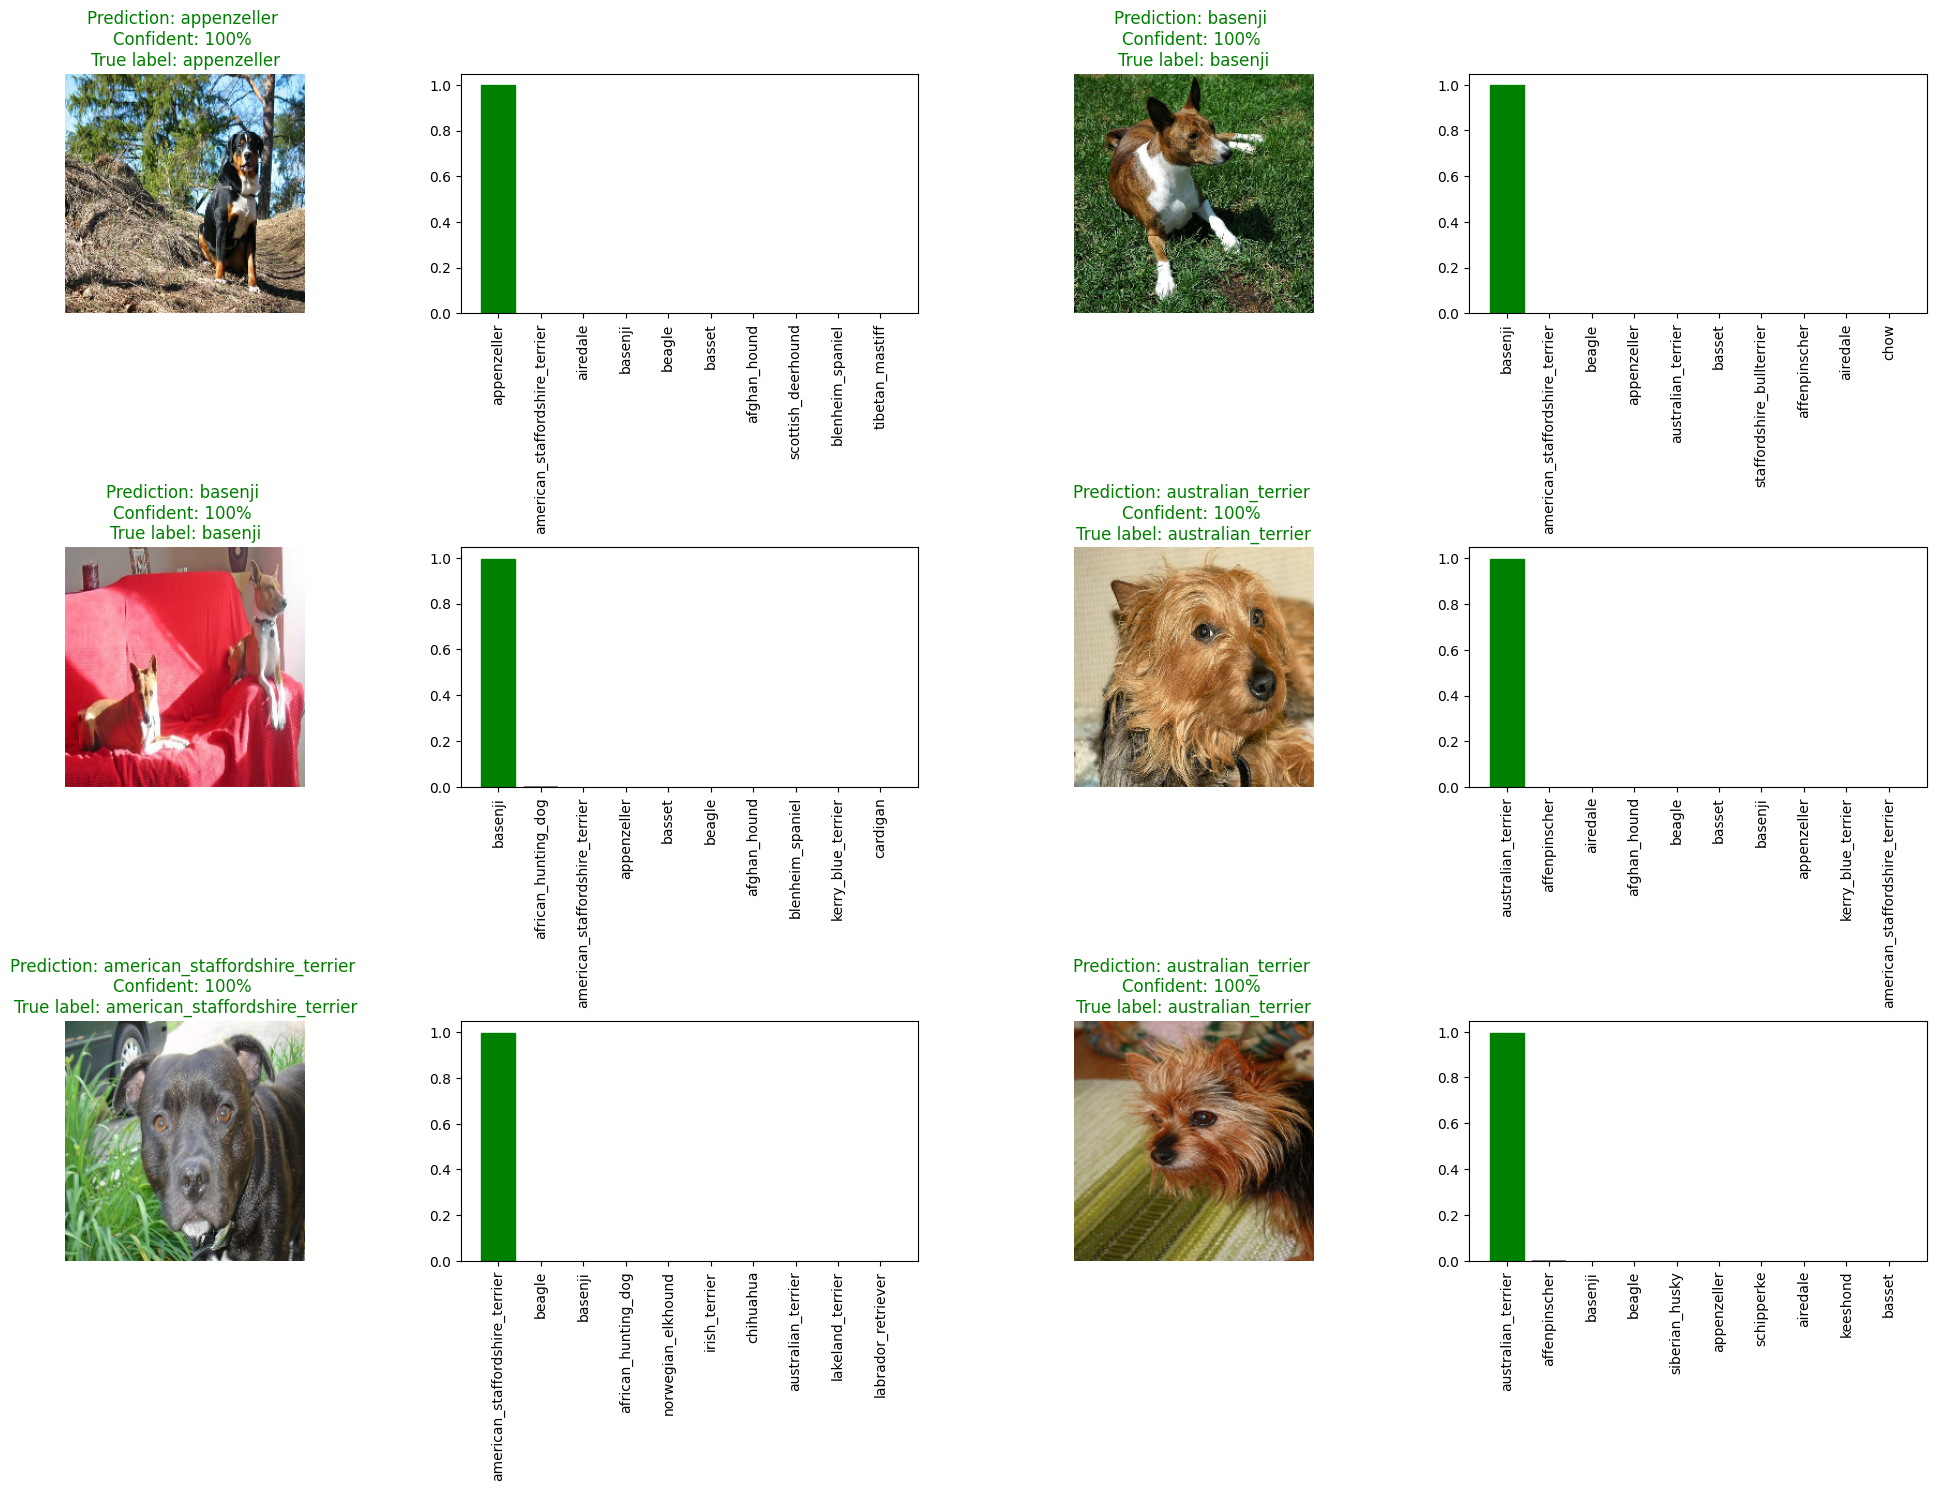

In [73]:
# Let's check out a few predictions and their different values
i_multiplier = 0 # number semples
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))

for i in range(num_images):
  plt.subplot (num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading a trained model

In [81]:
# Create a function to save a model
PATH_TO_SAVE_MODEL = "/content/drive/MyDrive/Colab_Notebooks/DogData/models"
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join(PATH_TO_SAVE_MODEL,
                          datetime.datetime.now().strftime ("%d-%m-%y--%H:%M:%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path, save_format='tf')


  return model_path

In [75]:
# Create a function to load a trained model
def load_model (model_path):
  """
    Loads a saved model from a specified path.
  """

  import tensorflow as tf
  import tensorflow_hub as hub


  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer" : hub.KerasLayer})
  return model

In [82]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-resnet_v2-Adam")

Saving model to: /content/drive/MyDrive/Colab_Notebooks/DogData/models/22-05-24--11:30:1716377416-1000-images-resnet_v2-Adam.h5...


'/content/drive/MyDrive/Colab_Notebooks/DogData/models/22-05-24--11:30:1716377416-1000-images-resnet_v2-Adam.h5'

In [83]:
# Load a trained model
PATH_TO_LOAD_MODEL = "/content/drive/MyDrive/Colab_Notebooks/DogData/models/22-05-24--11:30:1716377416-1000-images-resnet_v2-Adam.h5"
loaded_1000_image_model = load_model(PATH_TO_LOAD_MODEL)

Loading saved model from: /content/drive/MyDrive/Colab_Notebooks/DogData/models/22-05-24--11:30:1716377416-1000-images-resnet_v2-Adam.h5


In [84]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 161ms/step - loss: 0.1850 - accuracy: 0.9500


[0.18503183126449585, 0.949999988079071]

In [85]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 3s 157ms/step - loss: 0.1850 - accuracy: 0.9500


[0.18503183126449585, 0.949999988079071]

## Training a model on the full data

In [86]:
len(X), len(y) # full len of data

(22222, 22222)

In [90]:
# Create a data batch with the full data set
full_data = create_data_batches(X, y)

Creating training data batches...


In [91]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [92]:
# Create a model for full model
full_model = create_model()

Building model with:  https://www.kaggle.com/models/google/resnet-v2/frameworks/TensorFlow2/variations/101-classification/versions/2


In [93]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf .keras.callbacks.EarlyStopping(monitor="accuracy",
                                                              patience=3)

**Note:** Running the cell below will take a little while (maybe up to 30 minutes for the first epoch) because the GPU we're using in the runtime has to load all of the images into memory.

In [94]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])


Epoch 1/100
695/695 [==============================] - 3933s 6s/step - loss: 1.1485 - accuracy: 0.7147
Epoch 2/100
695/695 [==============================] - 119s 170ms/step - loss: 0.5434 - accuracy: 0.8377
Epoch 3/100
695/695 [==============================] - 118s 170ms/step - loss: 0.3942 - accuracy: 0.8785
Epoch 4/100
695/695 [==============================] - 118s 169ms/step - loss: 0.2949 - accuracy: 0.9029
Epoch 5/100
695/695 [==============================] - 117s 168ms/step - loss: 0.2387 - accuracy: 0.9230
Epoch 6/100
695/695 [==============================] - 118s 169ms/step - loss: 0.2042 - accuracy: 0.9315
Epoch 7/100
695/695 [==============================] - 117s 169ms/step - loss: 0.1770 - accuracy: 0.9400
Epoch 8/100
695/695 [==============================] - 118s 169ms/step - loss: 0.1495 - accuracy: 0.9487
Epoch 9/100
695/695 [==============================] - 117s 168ms/step - loss: 0.1420 - accuracy: 0.9516
Epoch 10/100
695/695 [==============================] - 1

In [96]:
full_model.evaluate(full_data)

695/695 [==============================] - 118s 168ms/step - loss: 0.0550 - accuracy: 0.9829


[0.05495145544409752, 0.9828548431396484]

### Disply images and predictions

In [97]:
def display_pred():
  predictions = full_model.predict(val_data, verbose=1)
  # Let's check out a few predictions and their different values
  i_multiplier = 12 # number semples
  num_rows = 3
  num_cols = 2
  num_images = num_rows*num_cols
  plt.figure(figsize=(10*num_cols, 5*num_rows))

  for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_pred(prediction_probabilities=predictions,
              labels=val_labels,
              images=val_images,
              n=i+i_multiplier)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_pred_conf(prediction_probabilities=predictions,
                  labels=val_labels,
                  n=i+i_multiplier)
  plt.tight_layout(h_pad=1.0)
  plt.show()

**We see that the model has a high accuracy on the training data, so we conclude that we have an "overfitting" situation**

In [95]:
save_model(full_model, "22_222-images-resnet_v2-Adam")

Saving model to: /content/drive/MyDrive/Colab_Notebooks/DogData/models/22-05-24--13:33:1716384791-22_222-images-resnet_v2-Adam.h5...


'/content/drive/MyDrive/Colab_Notebooks/DogData/models/22-05-24--13:33:1716384791-22_222-images-resnet_v2-Adam.h5'

In [100]:
# Load a trained model
PATH_TO_LOAD_MODEL = "/content/drive/MyDrive/Colab_Notebooks/DogData/models/22-05-24--13:33:1716384791-22_222-images-resnet_v2-Adam.h5"
loaded_22222_image_model = load_model(PATH_TO_LOAD_MODEL)

Loading saved model from: /content/drive/MyDrive/Colab_Notebooks/DogData/models/22-05-24--13:33:1716384791-22_222-images-resnet_v2-Adam.h5


## Making predictions on the test dataset

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the
same format.

Luckily we created `create_data_batches()` earlier which can take a list of filenames as input and conver them into Tensor batches.

To make predictions on the test data, we'll:
* Get the test image filenames.
* Convert the filenames into test data batches using `create_data_batches()` and setting the test_data parameter to `True` (since the test data doesn't have labels).
* Make a predictions array by passing the test batches to the `predict()` method called on our model.

In [103]:
# Load test image filenames
import os

test_path = 'drive/MyDrive/Colab_Notebooks/DogData/test'

test_filenames = [test_path + "/" + fname for fname in os.listdir(test_path)]

test_filenames = test_filenames[:100] # just first 100 images

test_filenames[:5]

['drive/MyDrive/Colab_Notebooks/DogData/test/e3f04efb648b110b2eb04b9c041504d8.jpg',
 'drive/MyDrive/Colab_Notebooks/DogData/test/e3cfadb2543190f43da6bb5500c75578.jpg',
 'drive/MyDrive/Colab_Notebooks/DogData/test/dd39ff72939c0445a76f0e7db9985f56.jpg',
 'drive/MyDrive/Colab_Notebooks/DogData/test/e0ccfbe350e0e8bc7bb7e1f95fa07b3b.jpg',
 'drive/MyDrive/Colab_Notebooks/DogData/test/e25f28a6c07bf3909c4310b2685f6caf.jpg']

In [104]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)
test_data

Creating test data batches...


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

**Note:** Calling predict () on our full model and passing it the test data batch will take a long time to run (about an ~1hr).

In [105]:
# Make predictions on test data batch using the train full model
test_predictions = loaded_2222_image_model.predict(test_data, verbose=1)
test_predictions.shape

4/4 [==============================] - 23s 5s/step


(100, 120)

In [106]:
# Get test image prediction labels
test_pred_labels = [get_pred_label(test_predictions[i]) for i in range(len(test_predictions))]

test_pred_labels[:5]

['maltese_dog', 'cairn', 'papillon', 'silky_terrier', 'papillon']

In [107]:
test_images = []

for image in test_data.unbatch().as_numpy_iterator():
  test_images.append(image)

In [108]:
# Check test predictions
# Print image and predicted label
def print_test_image_and_predicted_label(num_images=1):
  import matplotlib.pyplot as plt

  plt.figure(figsize=(15, 15))
  for i, image in enumerate(test_images[:num_images]):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(test_pred_labels[i])
    plt.imshow(image)
    print(test_pred_labels[i]) # just for coping

maltese_dog
cairn
papillon
silky_terrier
papillon
pug
american_staffordshire_terrier
tibetan_terrier
sealyham_terrier
papillon


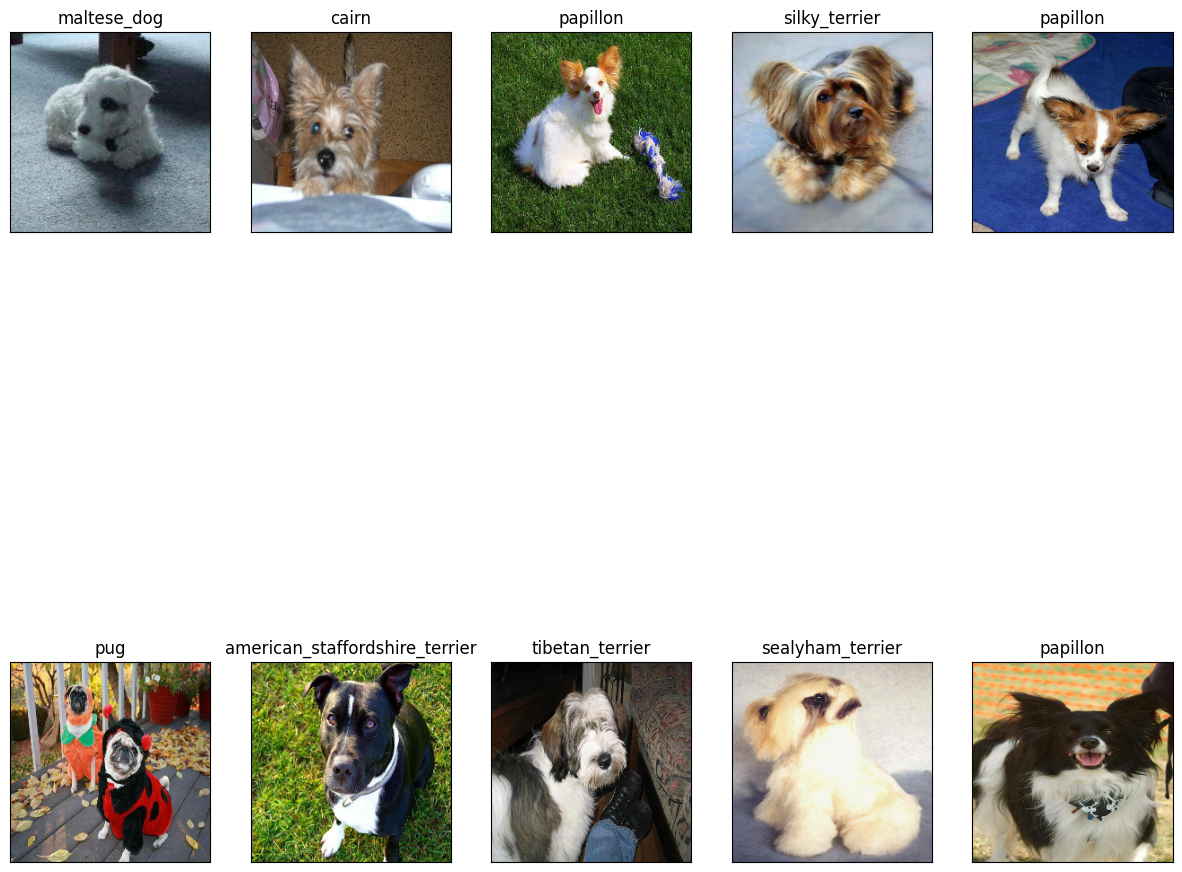

In [109]:
print_test_image_and_predicted_label(10)

In [110]:
# Save predictions (NumPy array) to csv file (for access later)
np.savetxt("drive/MyDrive/Colab_Notebooks/DogData/pred_array.csv", test_predictions, delimiter=",")

------------------------------------------

## Making predictions on custom images
To make predictions on custom images, well:
* Get the filepaths of our own images.
* Turn the filepaths into data batches using `create_data_batches()`. And since our custom images won't have labels, we set the
`test_data` parameter to `True`.
* Pass the custo f image data batch to our model's `predict()` method.
* Convert the presiction output probabilities to predictions labels.
* Compare the predicted labels to the custom images.

In [117]:
# Get custom image filepath
custom_path = "drive/MyDrive/Colab_Notebooks/DogData/my-dog-img"

custom_image_path = [custom_path + "/" + fname for fname in os.listdir(custom_path)]

custom_image_path[:5]

['drive/MyDrive/Colab_Notebooks/DogData/my-dog-img/0a053ff8908375e9579ead9f3965e0ce.jpg',
 'drive/MyDrive/Colab_Notebooks/DogData/my-dog-img/0a30903466bc4f7532843b0ccdd09e2a.jpg',
 'drive/MyDrive/Colab_Notebooks/DogData/my-dog-img/0a3f1f6f5f0ede7ea6e27427994d5f62.jpg',
 'drive/MyDrive/Colab_Notebooks/DogData/my-dog-img/0a1be1191b5c9d91392bb1e373600259.jpg',
 'drive/MyDrive/Colab_Notebooks/DogData/my-dog-img/00a6892e5c7f92c1f465e213fd904582.jpg']

In [118]:
# Turn custom images into batch datasets
custom_data = create_data_batches(custom_image_path, test_data=True)

custom_data

Creating test data batches...


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [119]:
# Make predictions on the custom data
custom_preds = loaded_22222_image_model.predict(custom_data)
custom_preds.shape

1/1 [==============================] - 8s 8s/step


(29, 120)

In [120]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]

custom_pred_labels

['entlebucher',
 'miniature_pinscher',
 'bedlington_terrier',
 'leonberg',
 'clumber',
 'norwich_terrier',
 'sealyham_terrier',
 'german_shepherd',
 'french_bulldog',
 'silky_terrier',
 'american_staffordshire_terrier',
 'cairn',
 'german_shepherd',
 'miniature_pinscher',
 'yorkshire_terrier',
 'dingo',
 'great_dane',
 'pug',
 'great_pyrenees',
 'vizsla',
 'staffordshire_bullterrier',
 'black-and-tan_coonhound',
 'collie',
 'soft-coated_wheaten_terrier',
 'border_terrier',
 'rottweiler',
 'miniature_schnauzer',
 'flat-coated_retriever',
 'afghan_hound']

In [121]:
custom_images = []

for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

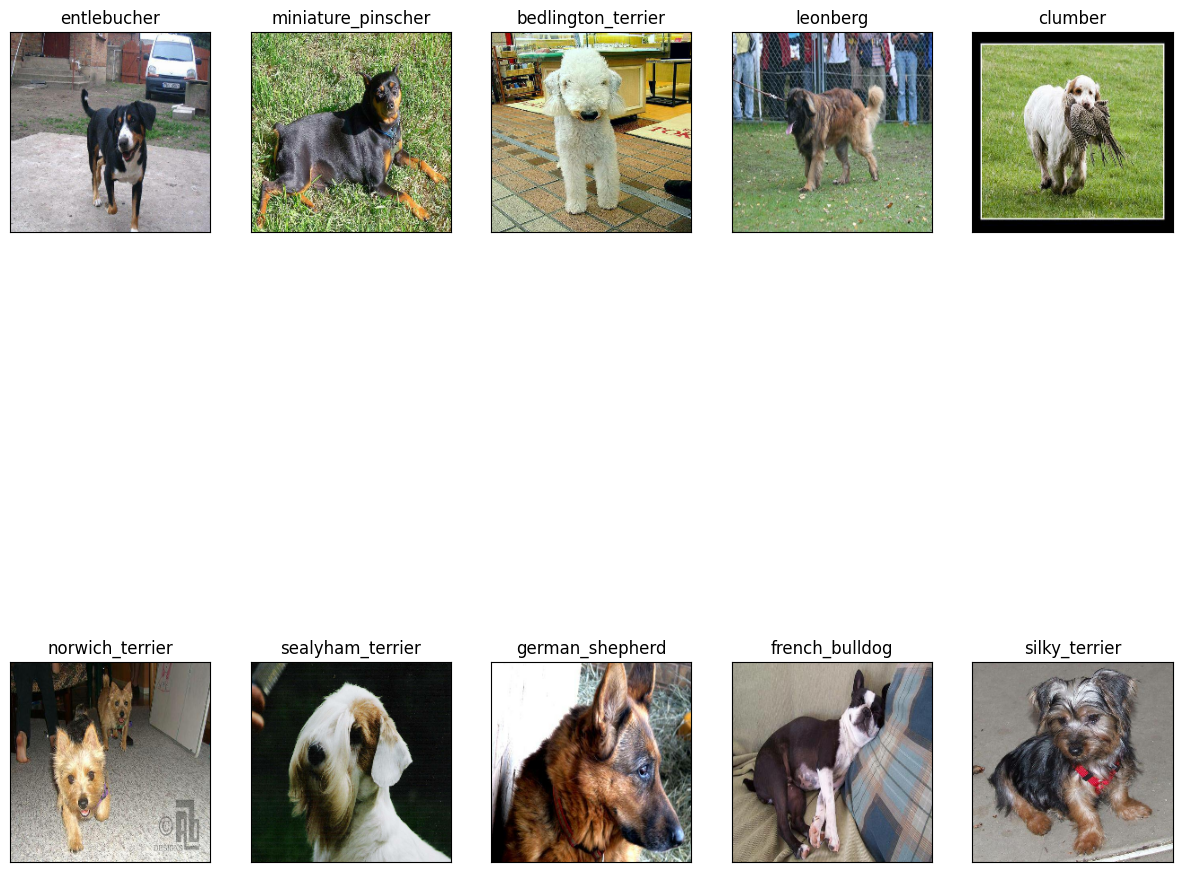

In [122]:
# Check custom predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for i, image in enumerate(custom_images[:10]):
  plt.subplot(2, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)

-----------------------------------------------------------